In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
import tifffile
from PIL import Image
import statistics

In [82]:
exp_dir = r"E:\ExperimentData\Imaging\2025_06_09_CALORIMETRIC_EXP\Images"
config_file = r"F:\Work\Colorimetry\Analysis.xlsx"
out_path = r"F:\Work\Colorimetry\09_06_2025_Results"
data = pd.read_excel(config_file, sheet_name = "09_06_2025_Exp")

In [5]:
start_folder = 6
end_folder = 30
width = 3
folders = [str(number).zfill(width) for number in range(start_folder, end_folder + 1)]

In [83]:
data['Sample'] = data['Sample'].apply(lambda x: x.replace("_", ""))
data.head()

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,006,No Sample,NaN,NaN,128,941,517,99,329,NaN,NaN,NaN,NaN
1,007,10,0.0,0.0,128,934,703,95,148,NaN,NaN,NaN,NaN
2,008,10,300.0,0.0,128,893,682,100,169,NaN,NaN,NaN,NaN
3,009,10,300.0,2.0,128,893,682,100,169,NaN,NaN,NaN,NaN
4,010,1,300.0,0.0,128,915,639,95,215,NaN,NaN,NaN,NaN


# Crop Images

In [26]:
data['coords'] = data[['x','y','w','h']].apply(list, axis=1)

In [27]:
coords_dict = data.set_index('Sample')['coords'].to_dict()

{'006': [941, 517, 99, 329],
 '007': [934, 703, 95, 148],
 '008': [893, 682, 100, 169],
 '009': [893, 682, 100, 169],
 '010': [915, 639, 95, 215],
 '011': [915, 639, 95, 215],
 '012': [929, 675, 98, 171],
 '013': [945, 677, 78, 169],
 '014': [945, 677, 78, 169],
 '015': [909, 651, 93, 194],
 '016': [909, 651, 93, 194],
 '017': [807, 674, 90, 179],
 '018': [890, 674, 93, 179],
 '019': [890, 674, 93, 179],
 '020': [901, 629, 92, 217],
 '021': [901, 629, 92, 217],
 '022': [895, 670, 90, 181],
 '023': [895, 656, 87, 190],
 '024': [873, 635, 88, 208],
 '025': [880, 680, 90, 168],
 '026': [880, 680, 90, 168],
 '027': [868, 626, 98, 222],
 '028': [868, 626, 98, 222],
 '029': [903, 668, 91, 171],
 '030': [903, 668, 91, 171]}

In [37]:
for folder in os.listdir(exp_dir):
    folder_path = exp_dir + "/" + folder
    for file in os.listdir(folder_path):
        x, y, w, h = coords_dict[folder]
        im = Image.open(folder_path + "/" + file)
        img_array = np.array(im)
        rgb_image = img_array[y:y+h, x:x+w, :3]
        out_file_path = out_path + "/" + folder
        if not os.path.exists(out_file_path):
            os.mkdir(out_file_path)
        cv2.imwrite(out_file_path + "/" + file.split(".")[0] + ".jpg", cv2.cvtColor(rgb_image, cv2.COLOR_RGB2BGR))
    print(f"Folder {folder} is completed..")

Folder 006 is completed..
Folder 007 is completed..
Folder 008 is completed..
Folder 009 is completed..
Folder 010 is completed..
Folder 011 is completed..
Folder 012 is completed..
Folder 013 is completed..
Folder 014 is completed..
Folder 015 is completed..
Folder 016 is completed..
Folder 017 is completed..
Folder 018 is completed..
Folder 019 is completed..
Folder 020 is completed..
Folder 021 is completed..
Folder 022 is completed..
Folder 023 is completed..
Folder 024 is completed..
Folder 025 is completed..
Folder 026 is completed..
Folder 027 is completed..
Folder 028 is completed..
Folder 029 is completed..
Folder 030 is completed..


In [38]:
data.head()

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,_006,No Sample,NaN,NaN,128,941,517,99,329,NaN,NaN,NaN,NaN
1,_007,10,300.0,NaN,128,934,703,95,148,NaN,NaN,NaN,NaN
2,_008,10,300.0,NaN,128,893,682,100,169,NaN,NaN,NaN,NaN
3,_009,10,300.0,2,128,893,682,100,169,NaN,NaN,NaN,NaN
4,_010,1,300.0,NaN,128,915,639,95,215,NaN,NaN,NaN,NaN


In [84]:
initial_samples = data[(data['Timing'] == 0) | (data['Timing'] == -1)]
initial_samples

,Sample,Molar,Dye,Timing,Black level,x,y,w,h,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
1,007,10,0.0,0.0,128,934,703,95,148,NaN,NaN,NaN,NaN
2,008,10,300.0,0.0,128,893,682,100,169,NaN,NaN,NaN,NaN
4,010,1,300.0,0.0,128,915,639,95,215,NaN,NaN,NaN,NaN
6,012,0.1,300.0,0.0,128,929,675,98,171,NaN,NaN,NaN,NaN
9,015,0.01,300.0,0.0,128,909,651,93,194,NaN,NaN,NaN,NaN
12,018,10,400.0,0.0,128,890,674,93,179,NaN,NaN,NaN,NaN
14,020,1,400.0,0.0,128,901,629,92,217,NaN,NaN,NaN,NaN
16,022,0.1,400.0,-1.0,128,895,670,90,181,2 mins continuous,NaN,NaN,NaN
17,023,0.01,400.0,-1.0,128,895,656,87,190,2 mins continuous,NaN,NaN,NaN
18,024,0.001,300.0,-1.0,128,873,635,88,208,2 mins continuous,NaN,NaN,NaN


In [91]:
res_df = initial_samples[['Sample', 'Molar', 'Dye']]
res_df.head()

,Sample,Molar,Dye
1,007,10,0.0
2,008,10,300.0
4,010,1,300.0
6,012,0.1,300.0
9,015,0.01,300.0


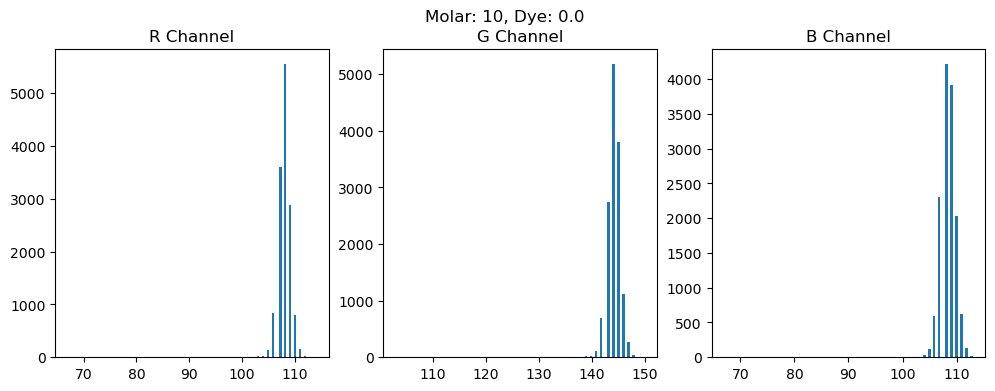

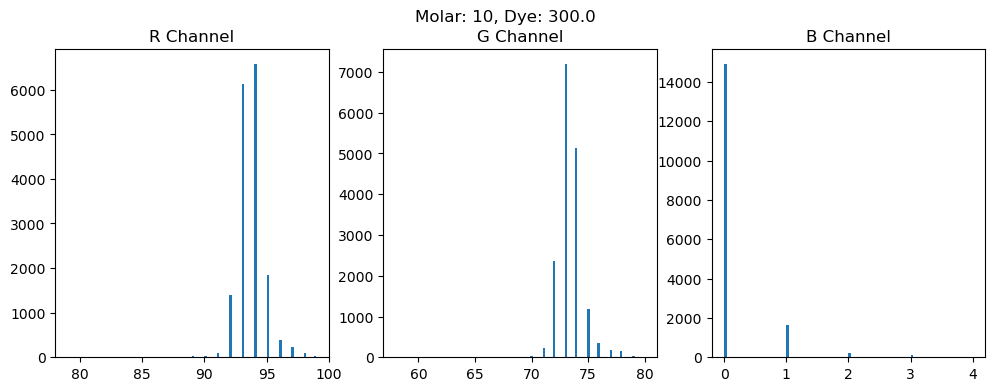

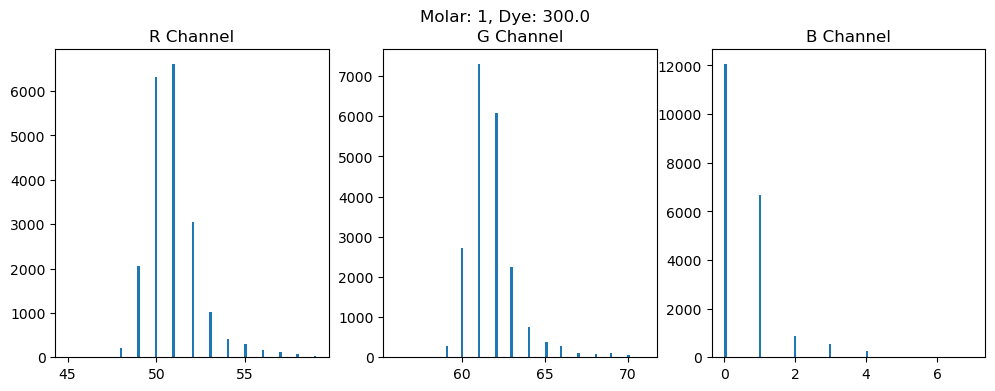

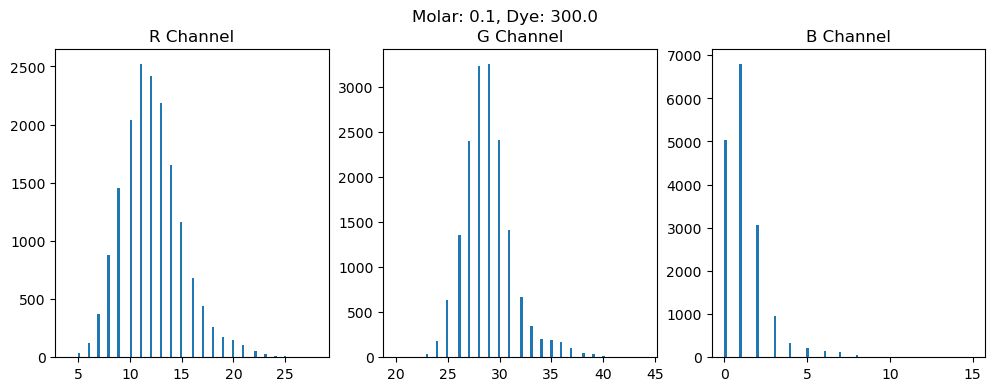

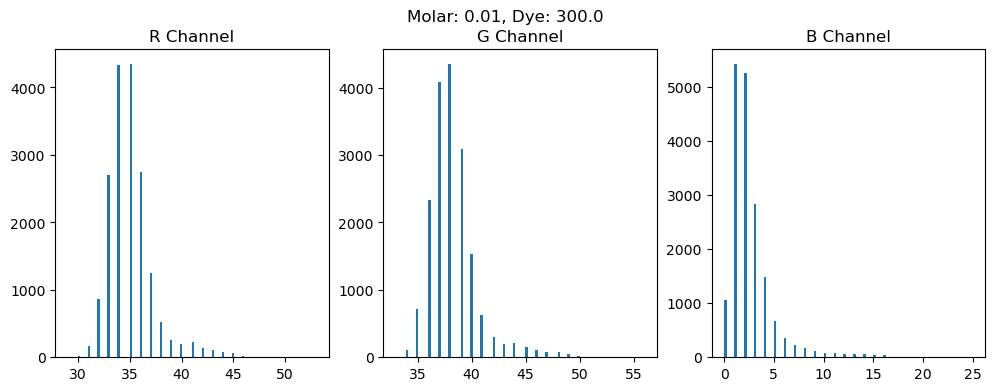

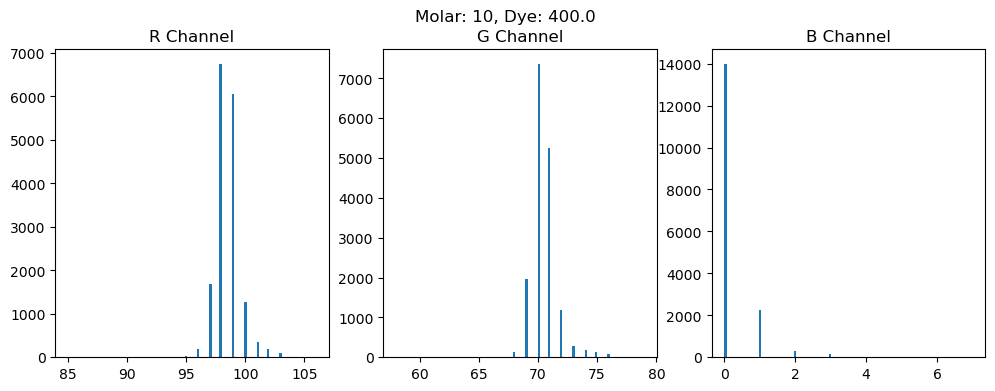

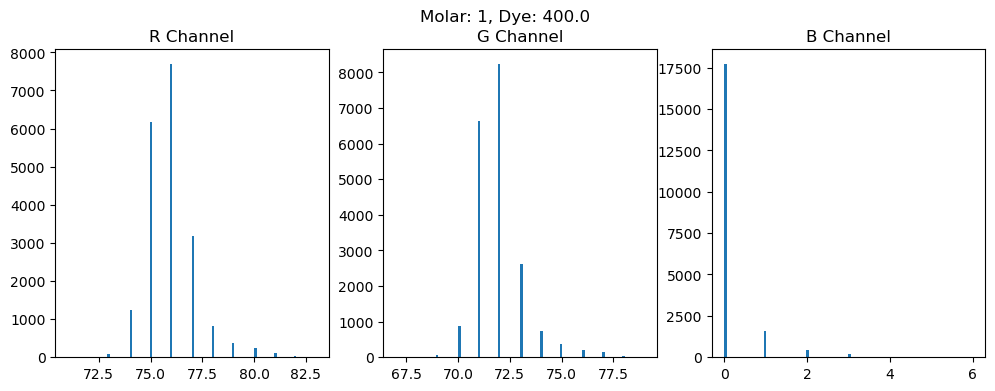

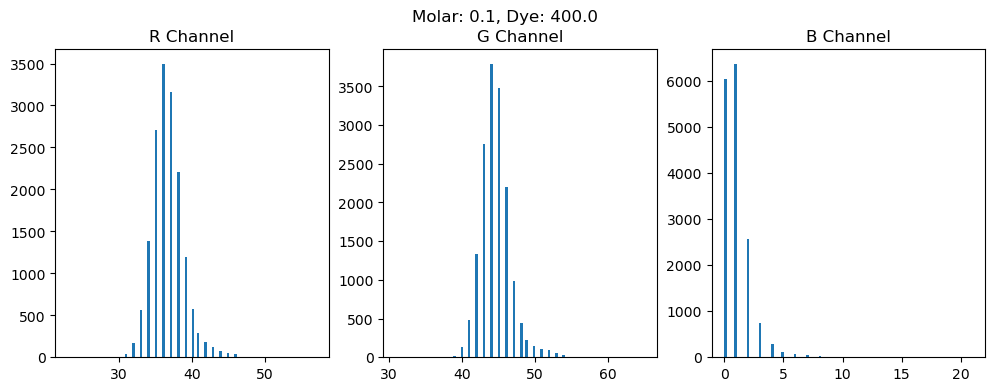

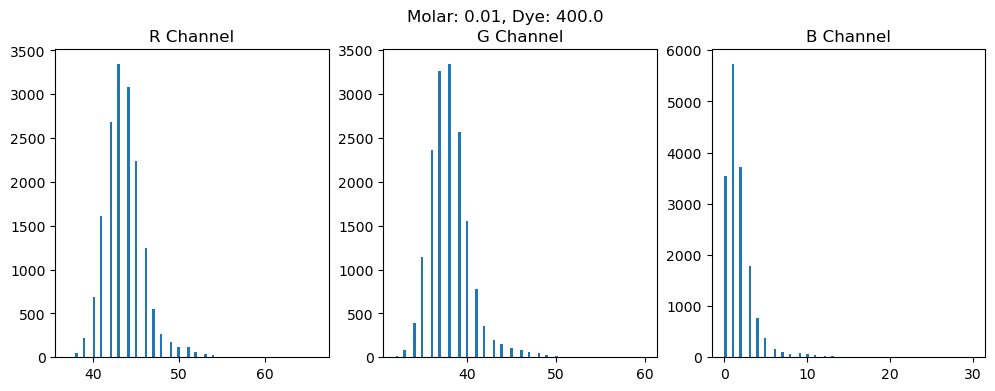

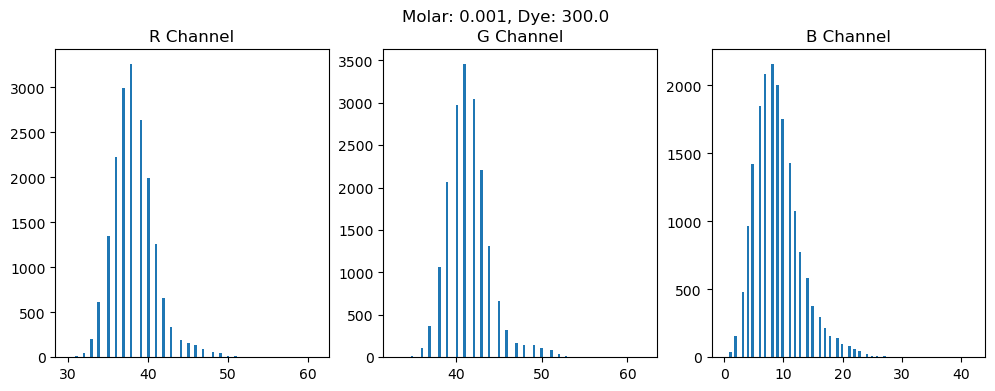

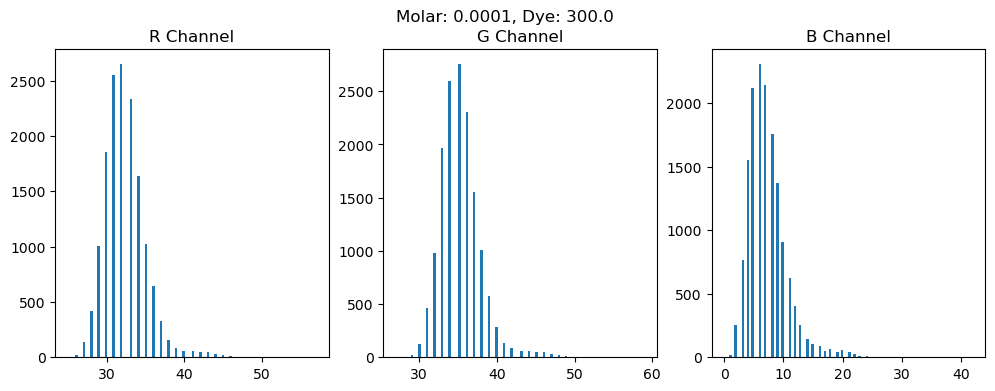

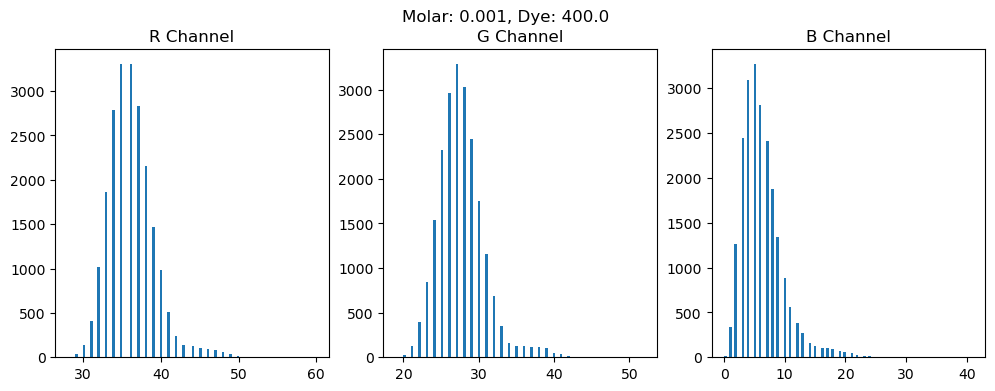

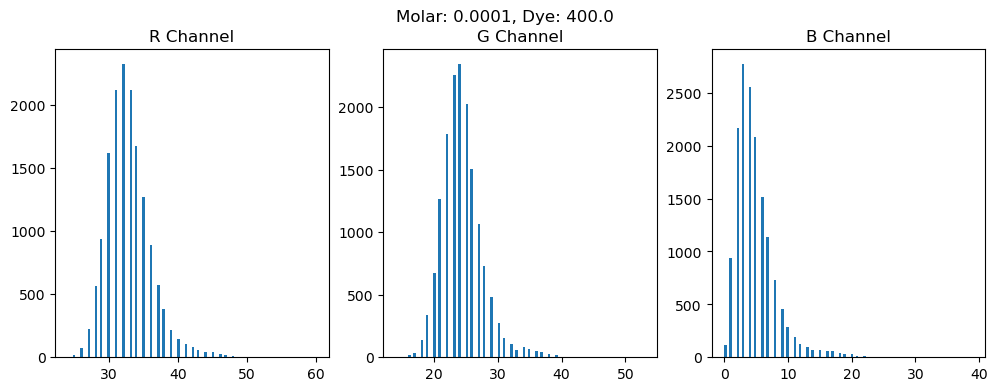

In [96]:
folders = list(initial_samples['Sample'])
special_folders = ['022', '023', '024']
processed = out_path
rstat = {}
gstat = {}
bstat = {}
rdist = {}
gdist = {}
bdist = {}
for i in range(len(res_df)):
    folder = res_df['Sample'].iloc[i]
    folder_path  = processed  + "/" + folder
    accumulator = None
    if folder in special_folders:
        for file in sorted(os.listdir(folder_path))[:10]:
            img = cv2.imread(folder_path + "/" + file).astype(np.float32)
            if accumulator is None:
                accumulator = img
            else:
                accumulator += img       
        average_img = accumulator / 10
    else:
        for file in os.listdir(folder_path):
            img = cv2.imread(folder_path + "/" + file).astype(np.float32)
            if accumulator is None:
                accumulator = img
            else:
                accumulator += img
        average_img = accumulator / len(os.listdir(folder_path))
    average_img = np.clip(average_img, 0, 255).astype(np.uint8)
    b = average_img[:,:, 0]
    g = average_img[:,:, 1]
    r = average_img[:,:, 2]
    rdist[folder] = r
    gdist[folder] = g
    bdist[folder] = b
    rstat[folder] = [np.mean(r), np.median(r), statistics.mode(r.flatten()), np.min(r), np.max(r), np.std(r)]
    gstat[folder] = [np.mean(g), np.median(g), statistics.mode(g.flatten()), np.min(g), np.max(g), np.std(g)]
    bstat[folder] = [np.mean(b), np.median(b), statistics.mode(b.flatten()), np.min(b), np.max(b), np.std(b)]
    title = f"Molar: {res_df['Molar'].iloc[i]}, Dye: {res_df['Dye'].iloc[i]}"
    plot_hist([r, g, b], title)

{'007': [107.89374110953058, 108.0, 108, 67, 114, 1.3702085588892634],
 '008': [93.64763313609467, 94.0, 94, 79, 99, 1.1378027024362483],
 '010': [50.940856793145656, 51.0, 51, 45, 59, 1.5171408238424664],
 '012': [12.156104547081991, 12.0, 11, 4, 28, 2.9305689390102283],
 '015': [35.029209621993125, 35.0, 35, 29, 53, 2.18884017529913],
 '018': [98.51498768546885, 98.0, 98, 85, 106, 1.0995941892617385],
 '020': [75.93433179723502, 76.0, 76, 71, 83, 1.2115641324641002],
 '022': [36.64352363413137, 36.0, 36, 23, 57, 2.1956894785633603],
 '023': [43.59975801572898, 43.0, 43, 37, 66, 2.2999513268747487],
 '024': [38.27862762237762, 38.0, 38, 30, 61, 2.6526906852900165],
 '025': [32.36210317460318, 32.0, 32, 25, 57, 2.642255393801776],
 '027': [36.20136973708402, 36.0, 35, 28, 60, 2.9766727988722588],
 '029': [32.82867424972688, 32.0, 32, 24, 60, 3.203759254323988]}

In [64]:
def plot_hist(channels,title = ''):
    plt.figure(figsize=(12,4)).suptitle(title)
    plt.subplot(1,3,1)
    plt.hist(channels[0].flatten(), bins=100)
    plt.title('R Channel')
    plt.subplot(1,3,2)
    plt.hist(channels[1].flatten(), bins=100)
    plt.title('G Channel')
    plt.subplot(1,3,3)
    plt.hist(channels[2].flatten(), bins=100)
    plt.title('B Channel')
    plt.show()

# Build Results

In [ ]:
cols = ['Mean', 'Median', 'Mode', 'Min', 'Max', 'Std']
r_df = pd.DataFrame.from_dict(rstat, orient='index', columns=["R_" + col for col in cols])
g_df = pd.DataFrame.from_dict(gstat, orient='index', columns=["G_" + col for col in cols])
b_df = pd.DataFrame.from_dict(bstat, orient='index', columns=["B_" + col for col in cols])

In [ ]:
final_df = pd.concat([res_df, r_df, g_df, b_df], axis=1)
final_df.to_csv("09_06_2025_Results.csv")

# Exploratory Data Analysis

## RGB Plot for 300 Molar

In [98]:
Samples = list(res_df[res_df['Dye'] == 300]['Sample'])
Molars = list(res_df[res_df['Dye'] == 300]['Molar'])   

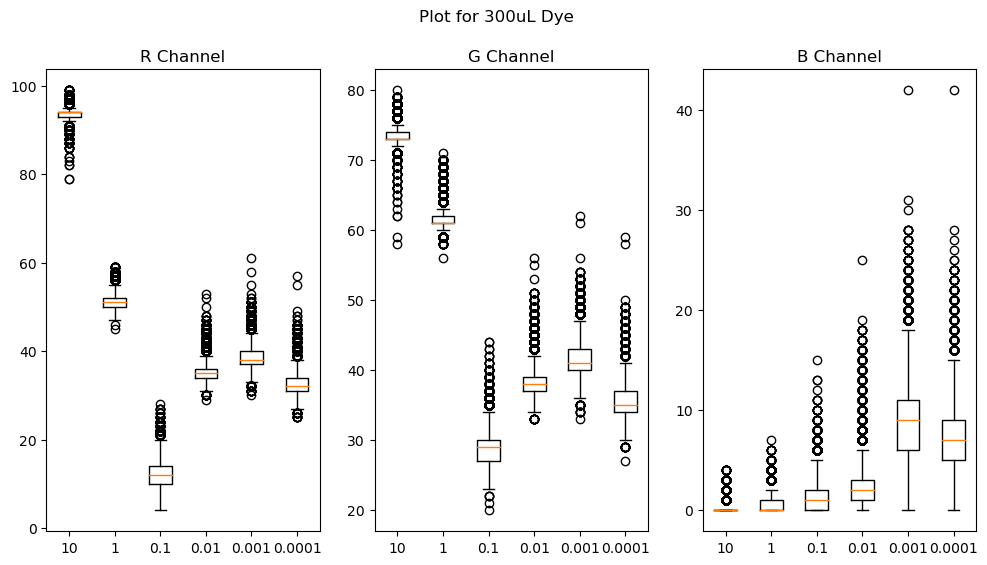

In [114]:
plt.figure(figsize=(12,6)).suptitle("Plot for 300uL Dye")
plt.subplot(1,3,1)
filtered_dict = {k: v.flatten() for k, v in rdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('R Channel')
plt.subplot(1,3,2)
filtered_dict = {k: v.flatten() for k, v in gdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('G Channel')
plt.subplot(1,3,3)
filtered_dict = {k: v.flatten() for k, v in bdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('B Channel')
plt.show()

## RGB Plot for 400 Molar

In [115]:
Samples = list(res_df[res_df['Dye'] == 400]['Sample'])
Molars = list(res_df[res_df['Dye'] == 400]['Molar'])   

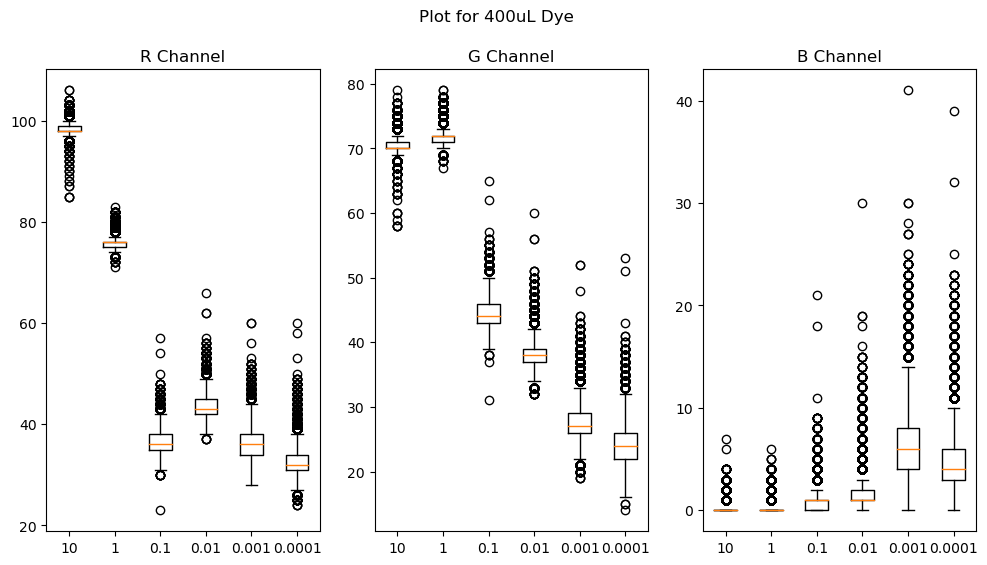

In [116]:
plt.figure(figsize=(12,6)).suptitle("Plot for 400uL Dye")
plt.subplot(1,3,1)
filtered_dict = {k: v.flatten() for k, v in rdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('R Channel')
plt.subplot(1,3,2)
filtered_dict = {k: v.flatten() for k, v in gdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('G Channel')
plt.subplot(1,3,3)
filtered_dict = {k: v.flatten() for k, v in bdist.items() if k in Samples}
plt.boxplot(filtered_dict.values(), labels=Molars)
plt.title('B Channel')
plt.show()

## Statistical Analysis of RGB Plot 300 Molar

In [168]:
def plot_channels(df, dye, typ, fig_title = "", fig = None, c='b'):    
    def_cols = ['Molar']
    part_cols = [col for col in list(df.columns) if typ.lower() in col.lower()]
    part_df = df[df['Dye'] == dye][def_cols + part_cols]
    if fig is None:
        fig = plt.figure(figsize=(12,4)).suptitle(fig_title)
    plt.subplot(1,3,1)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -3], 'o', color = c)
    plt.title("R Channel")
    plt.subplot(1,3,2)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -2], 'o', color = c)
    plt.title("G Channel")
    plt.subplot(1,3,3)
    plt.plot(np.log10(part_df['Molar'].astype(np.float32)), part_df.iloc[:, -1], 'o', color = c)
    plt.title("B Channel")
    return fig

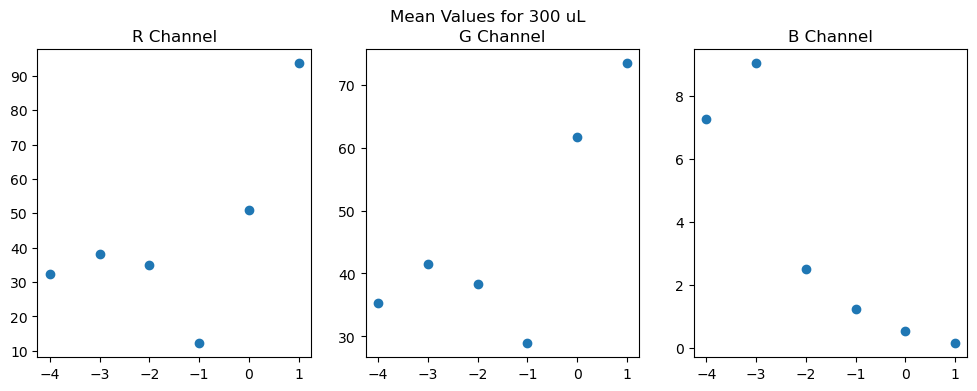

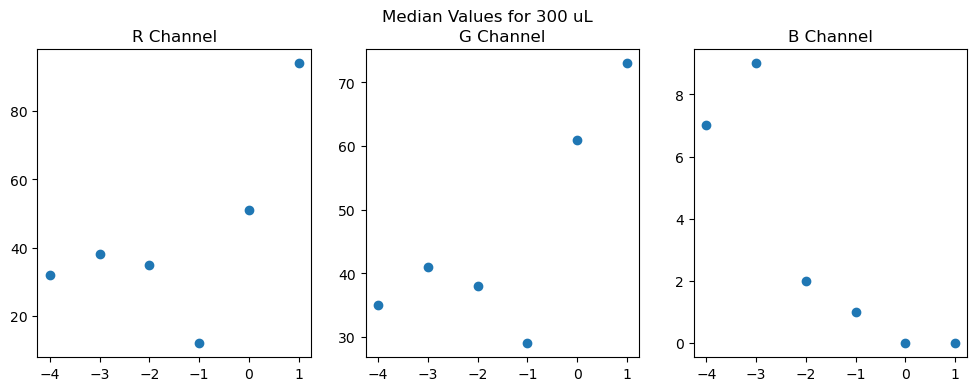

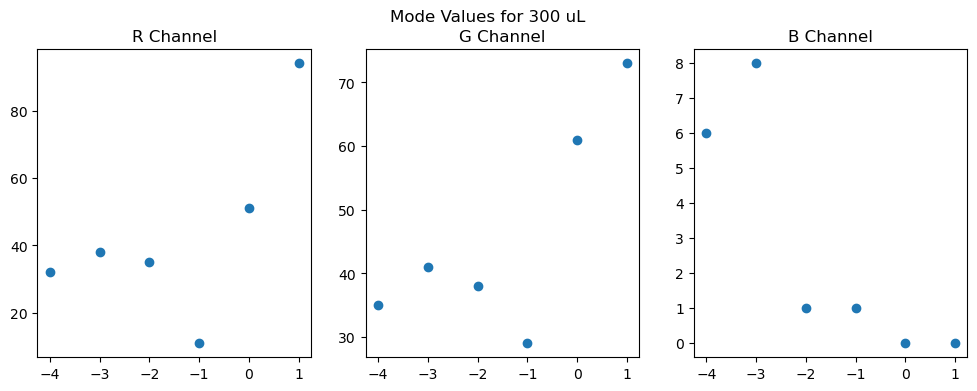

In [164]:
plot_channels(final_df, 300, 'mean', fig_title = "Mean Values for 300 uL")
plot_channels(final_df, 300, 'median', fig_title = "Median Values for 300 uL")
plot_channels(final_df, 300, 'mode', fig_title = "Mode Values for 300 uL")

## Statistical Analysis of RGB Plot 400 Molar

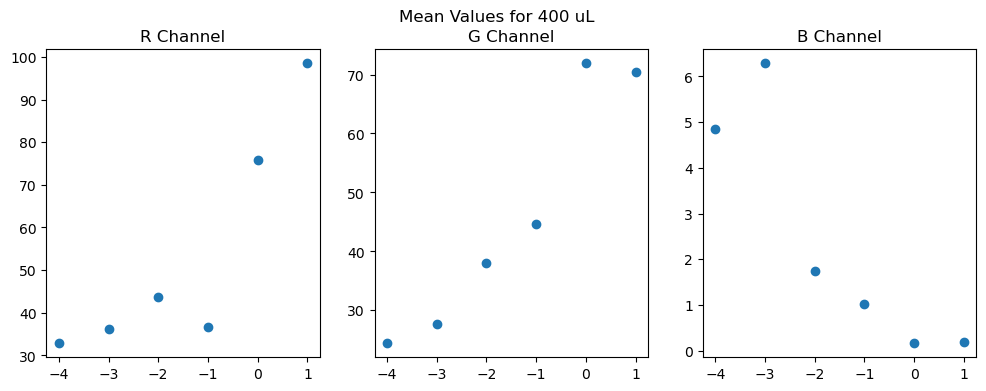

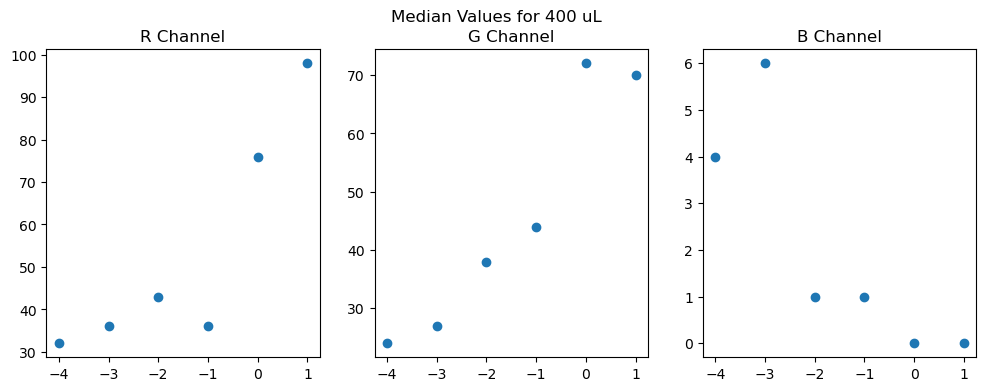

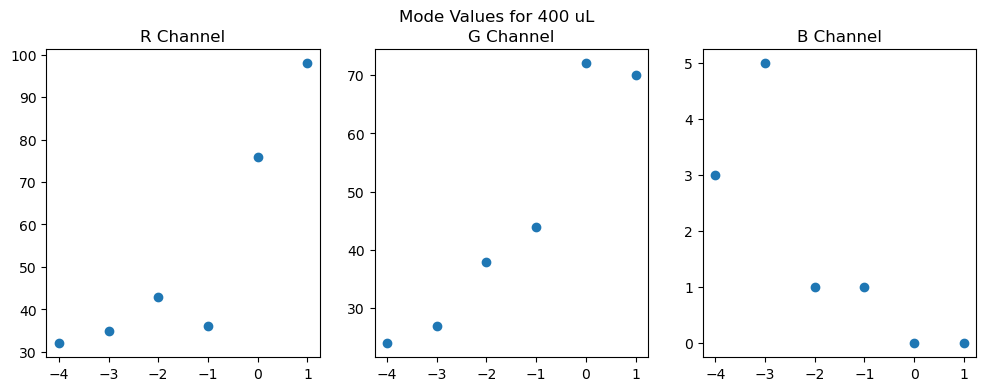

In [166]:
plot_channels(final_df, 400, 'mean', fig_title = "Mean Values for 400 uL")
plot_channels(final_df, 400, 'median', fig_title = "Median Values for 400 uL")
plot_channels(final_df, 400, 'mode', fig_title = "Mode Values for 400 uL")

In [ ]:
, color = c

In [150]:
## Statistical Analysis of RGB Plot 400 Molar
plot_channels(final_df, 400, 'mean', fig_title = "Mean Values for 400 uL")
plot_channels(final_df, 400, 'median', fig_title = "Median Values for 400 uL")
plot_channels(final_df, 400, 'mode', fig_title = "Mode Values for 400 uL")

008    10.0000
010     1.0000
012     0.1000
015     0.0100
024     0.0010
025     0.0001
Name: Molar, dtype: float32

In [151]:
np.log10(part_df['Molar'].astype(np.float32))

008    1.0
010    0.0
012   -1.0
015   -2.0
024   -3.0
025   -4.0
Name: Molar, dtype: float32